## 11.6 Importance Sampling

In [193]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sympy as sp

We want to numerically evaluted integrals

$$ F = \int_a^b f(x) dx$$

The error associated with a Monte Carlo estimate is proportional to

$$ \frac{\sigma}{\sqrt{n}}$$

So there are two ways to reduce the error - either increase the number of samples or reduce the variance.

*Importance sampling* techniques reduce $\sigma$ and improve the efficiency of each sample.

Introduce a positive function $p(x)$ such that

$$\int_a^b p(x) dx = 1$$

and rewrite the integral as 

$$ F = \int_a^b \left[ \frac{f(x)}{p(x)} \right] p(x) dx$$

We evaluate the intergral by sampling according to the probability distribution $p(x)$ and constructing the sum

$$ F_n = \frac {1}{n} \sum_{i=1}^{n} \frac{f(x_i)}{p(x_i)} $$

The idea is to choose a form for $p(x)$ that mimics $f(x)$ as much as possible especially where $f(x)$ is large.

### Example

Evaluate the integral (same one as Problem 11.10d, Assignment 3)

$$F = \int_0^1 e^{-x^2} dx$$

In [194]:
f = lambda x: np.exp(-x**2)

Monte Carlo with uniform sampling:

In [195]:
def mc_uniform(n):

    xi = np.random.random_sample(int(n))
    yi = f(xi)
    Fn = np.mean(yi)
    σ = np.std(yi)
    return {'method': 'Uniform distribution',
            '$n$' : n,
           '$F_n$' : Fn, 
           '$\sigma$' : σ,
           '$\sigma/\sqrt{n}$' : σ/np.sqrt(n)}

In [196]:
uniform_row = mc_uniform(5e6)
pd.DataFrame([uniform_row])

,method,$n$,$F_n$,$\sigma$,$\sigma/\sqrt{n}$
0,Uniform distribution,5000000.0,0.746671,0.201049,0.00009


Use importance sampling to choose values where $f(x)$ is large more often.  One choice would be use $p(x) = A e^{-x}$ where $A$ is chosen for normalization.

The choice of $p(x)$ is not unique. It just needs to be qualitatively similar.

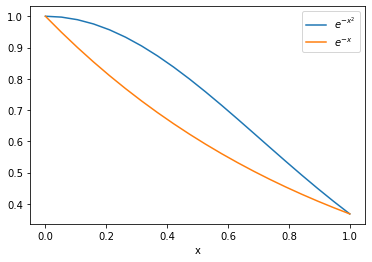

In [197]:
x = np.linspace(0, 1, 20)
plt.plot(x, np.exp(-x**2), label='$e^{-x^2}$')
plt.plot(x, np.exp(-x), label='$e^{-x}$')
plt.xlabel('x')
plt.legend()
plt.show()

$A$ is chosen so that

$$\int_0^1 p(x) dx = \int_0^1 A e^{-x} dx = 1$$

In [198]:
A, x = sp.symbols('A, x')
sp.solve( sp.integrate(A*sp.exp(-x), (x, 0, 1)) - 1, A)[0]

E/(-1 + E)

In [199]:
A = np.e / (np.e-1)
A

1.5819767068693265

From Section 11.5, we learned how to transform a uniform random distribution into a nonuniform random distribution.

In [200]:
x, A,  r = sp.symbols('x, A, r')
p = A*sp.exp(-x)
I = sp.Integral(p, (x, 0, x))
I

Integral(A*exp(-x), (x, 0, x))

In [201]:
P = I.doit()
P

A - A*exp(-x)

In [202]:
soln = sp.solve(sp.Eq(P, r), x)
soln[0]

log(A/(A - r))

So the tranformation

$$ x = \ln\left( \frac{A}{A -r}\right) $$

gives samples from a the nonuuniform distribution $p(x) = A e^{-x}$

as a valid transformation

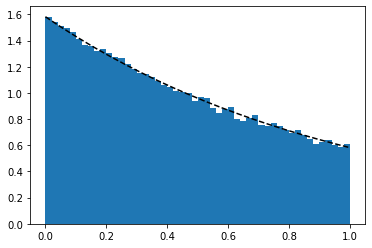

In [215]:
N = 100000
r = np.random.random_sample(N)
A = np.e / (np.e-1)
xi = np.log(A/(A - r)) 
plt.hist(xi, density=True, bins=50)
x = np.linspace(0, 1, 20)
plt.plot(x, A*np.exp(-x), 'k--')
plt.show()

In [206]:
def mc_nonuniform(n):

    # uniform distribution
    r = np.random.random_sample(int(n))

    # normalization constant
    A = np.e / (np.e-1)
    
    # transform to nonuniform distribution
    p = lambda x: A*np.exp(-x)
    xi = np.log(A/(A -r)) 
    
    yi = f(xi)/p(xi)
    
    Fn = np.mean(yi)
    σ = np.std(yi)
    return {'method': 'Non-uniform distribution',
            '$n$' : n,
           '$F_n$' : Fn, 
           '$\sigma$' : σ,
           '$\sigma/\sqrt{n}$' : σ/np.sqrt(n)}

In [207]:
nonuniform_row = mc_nonuniform(4e5)
pd.DataFrame([uniform_row, nonuniform_row])

,method,$n$,$F_n$,$\sigma$,$\sigma/\sqrt{n}$
0,Uniform distribution,5000000.0,0.746671,0.201049,0.000090
1,Non-uniform distribution,400000.0,0.746849,0.054998,0.000087


$n$ chosen to maintain the same sample mean error.

In [212]:
%%time
row = mc_uniform(5e6)

CPU times: user 115 ms, sys: 13.5 ms, total: 129 ms
Wall time: 132 ms


In [213]:
%%time
row = mc_nonuniform(4e5)

CPU times: user 21.1 ms, sys: 3.59 ms, total: 24.6 ms
Wall time: 25.3 ms


In [210]:
%%timeit
row = mc_uniform(5e6)

128 ms ± 9.03 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [211]:
%%timeit
row = mc_nonuniform(4e5)

19.9 ms ± 2.82 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


> **Problem 11.15** Importance samplin
>
> a. Choosef(x) =√1−x2and considerp(x) =A(1−x) forx≥0.  What is the value of A that normalizesp(x) in the unit interval [0,1]? What is the relation for the random variablexin terms ofrfor this form ofp(x)? What is the variance off(x)/p(x) in the unit interval?Evaluate the integral∫10f(x)dxusingn= 106and estimate the probable error of your result.
> 
> b. Choosep(x) =Ae−λx and evaluate the integral ∫π01x2+ cos2xdx.(11.47) Determine the value ofλthat minimizes the variance of the integrand.